# Supplementary Information: Holmes *et al.* 2017

# 18. Multiplexed predictions

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import pickle
import scipy
import seaborn as sns

import tools

import warnings
warnings.filterwarnings('ignore')

sns.set_context('notebook')

Populating the interactive namespace from numpy and matplotlib


## Load results

We load data from a multiplex run performed on `gruffalo`, with results joined using `join_multiplexed_data.py`. This gives us observed experimental input and output in `log_input` and `log_output`, with predicted mean and median in `y_pred_mean` and `y_pred_median`.

To assess the range of predictions, the 90% and 50% credibility intervals can be obtained with the `y_pred_5pc` and `y_pred_95pc` columns, and the `y_pred_25pc` and `y_pred_75pc` columns, respectively.

In [2]:
# Load predictions from file
results = pd.read_csv('2016-12-19_multiplexed_predictions.tab', sep='\t')
results.shape

(71808, 21)

In [3]:
# Inspect results
results.head()

,Unnamed: 0,dh10b_match,input,locus_tag,log_input,log_output,match,output,probe,replicate,...,treatment,probe_index,locus_index,y_pred_25pc,y_pred_5pc,y_pred_75pc,y_pred_95pc,y_pred_mean,y_pred_median,y_pred_sem
0,592,1.0,6026.244000,ECDH10B_RS00010,8.703879,8.527294,lcl|NC_010473.1_cds_WP_001264707.1_2,5050.760667,A_07_P010704,3,...,0,8059,8052,8.197668,7.808300,8.725320,9.111208,8.461625,8.474776,0.392840
1,2122,1.0,1759.647000,ECDH10B_RS00010,7.472868,7.123169,lcl|NC_010473.1_cds_WP_001264707.1_2,1240.375333,A_07_P010704,1,...,1,8059,8052,7.022213,6.603510,7.567018,7.938586,7.289686,7.310494,0.402685
2,2989,1.0,1885.753000,ECDH10B_RS00010,7.542082,7.132120,lcl|NC_010473.1_cds_WP_001264707.1_2,1251.527667,A_07_P010704,2,...,1,8059,8052,6.963611,6.528957,7.532236,7.915308,7.241164,7.255784,0.426668
3,297,1.0,6121.405000,ECDH10B_RS00010,8.719547,8.391842,lcl|NC_010473.1_cds_WP_001264707.1_2,4410.934000,A_07_P010704,1,...,0,8059,8052,8.232116,7.831317,8.743919,9.125942,8.490134,8.496791,0.391740
4,1136,1.0,1881.084333,ECDH10B_RS00010,7.539604,7.233352,lcl|NC_010473.1_cds_WP_001264707.1_2,1384.856333,A_07_P010704,3,...,1,8059,8052,7.061676,6.708318,7.642412,8.032466,7.356119,7.353845,0.410655


In [4]:
# Load fit data (parameter estimates, by locus_tag index)
fit = tools.parse_full_fit('output/2016-12-05_notebook16_full_fit.pkl', 'output/normalised_indexed_array_data.tab')
fit.shape

8532


(8532, 28)

In [5]:
# Merge fit estimates with observed data
results_merged = pd.merge(results, fit, how='outer', left_on='locus_tag', right_index=True)

In [6]:
results_merged.head()

,Unnamed: 0,dh10b_match,input,locus_tag,log_input,log_output,match,output,probe,replicate,...,g_mean,g_median,g_sem,d_2.5pc,d_25pc,d_75pc,d_97.5pc,d_mean,d_median,d_sem
0,592,1.0,6026.244000,ECDH10B_RS00010,8.703879,8.527294,lcl|NC_010473.1_cds_WP_001264707.1_2,5050.760667,A_07_P010704,3,...,0.340439,0.346436,0.07268,-0.069116,-0.056906,-0.049484,-0.03645,-0.053178,-0.052999,0.00788
1,2122,1.0,1759.647000,ECDH10B_RS00010,7.472868,7.123169,lcl|NC_010473.1_cds_WP_001264707.1_2,1240.375333,A_07_P010704,1,...,0.340439,0.346436,0.07268,-0.069116,-0.056906,-0.049484,-0.03645,-0.053178,-0.052999,0.00788
2,2989,1.0,1885.753000,ECDH10B_RS00010,7.542082,7.132120,lcl|NC_010473.1_cds_WP_001264707.1_2,1251.527667,A_07_P010704,2,...,0.340439,0.346436,0.07268,-0.069116,-0.056906,-0.049484,-0.03645,-0.053178,-0.052999,0.00788
3,297,1.0,6121.405000,ECDH10B_RS00010,8.719547,8.391842,lcl|NC_010473.1_cds_WP_001264707.1_2,4410.934000,A_07_P010704,1,...,0.340439,0.346436,0.07268,-0.069116,-0.056906,-0.049484,-0.03645,-0.053178,-0.052999,0.00788
4,1136,1.0,1881.084333,ECDH10B_RS00010,7.539604,7.233352,lcl|NC_010473.1_cds_WP_001264707.1_2,1384.856333,A_07_P010704,3,...,0.340439,0.346436,0.07268,-0.069116,-0.056906,-0.049484,-0.03645,-0.053178,-0.052999,0.00788


In [7]:
results_merged[['locus_tag', 'log_output', 'y_pred_mean', 'd_mean']].head()

,locus_tag,log_output,y_pred_mean,d_mean
0,ECDH10B_RS00010,8.527294,8.461625,-0.053178
1,ECDH10B_RS00010,7.123169,7.289686,-0.053178
2,ECDH10B_RS00010,7.132120,7.241164,-0.053178
3,ECDH10B_RS00010,8.391842,8.490134,-0.053178
4,ECDH10B_RS00010,7.233352,7.356119,-0.053178


## Plot results

In [8]:
# Calculate error and relative error
results_merged['y_pred_error'] = results_merged['y_pred_median'] - results_merged['log_output']
results_merged['y_pred_relative_error'] = results_merged['y_pred_error']/results_merged['log_output']

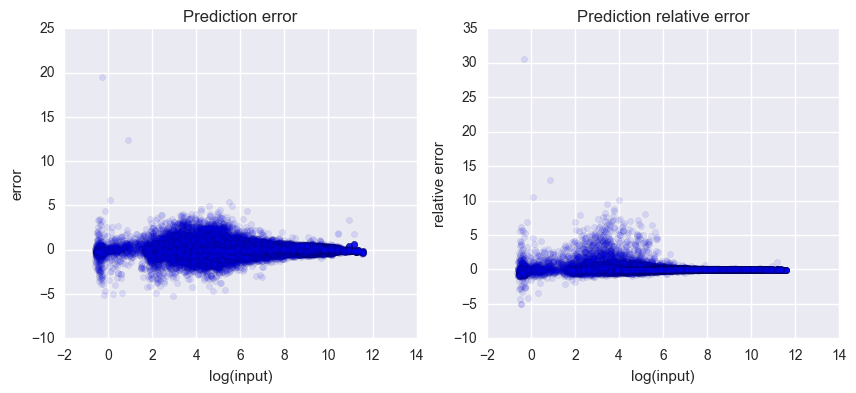

In [9]:
# Plot error and relative error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(results_merged['log_input'], results_merged['y_pred_error'], alpha=0.1)
ax1.set_xlabel('log(input)')
ax1.set_ylabel('error')
ax1.set_title('Prediction error')

ax2.scatter(results_merged['log_input'], results_merged['y_pred_relative_error'], alpha=0.1)
ax2.set_xlabel('log(input)')
ax2.set_ylabel('relative error')
ax2.set_title('Prediction relative error');

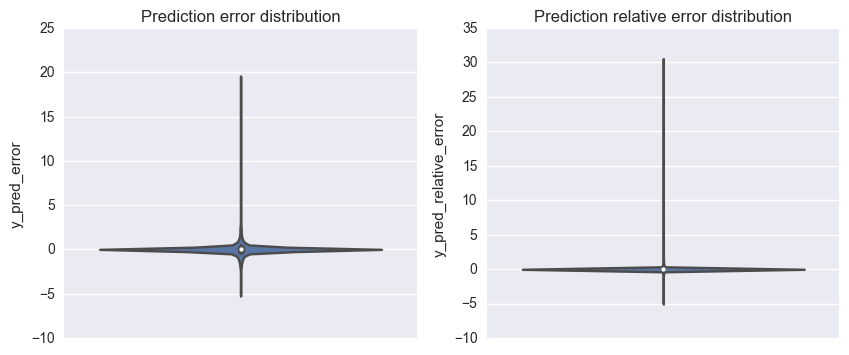

In [10]:
# Plot distributions of error and relative error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
p1 = sns.violinplot(results_merged['y_pred_error'], orient='vertical', ax=ax1);
p1.set_title("Prediction error distribution");

p2 = sns.violinplot(results_merged['y_pred_relative_error'], orient='vertical', ax=ax2);
p2.set_title("Prediction relative error distribution");

As an estimate of prediction accuracy, we can calculate the number of observed output intensities that lay outwith the 90% credibility interval of the prediction.

This identifies 5504/71808 probe predictions, for a total of 1377 locus_tags.

In [11]:
# Find which probe predictions lay outwith the 90% credibility interval of prediction
errors = results_merged.loc[(results_merged['log_output'] < results_merged['y_pred_5pc']) |
                            (results_merged['log_output'] > results_merged['y_pred_95pc'])]
errors.shape

(5504, 51)

In [12]:
error_locus_tags = errors['locus_tag'].unique()
error_locus_tags.shape

(1377,)

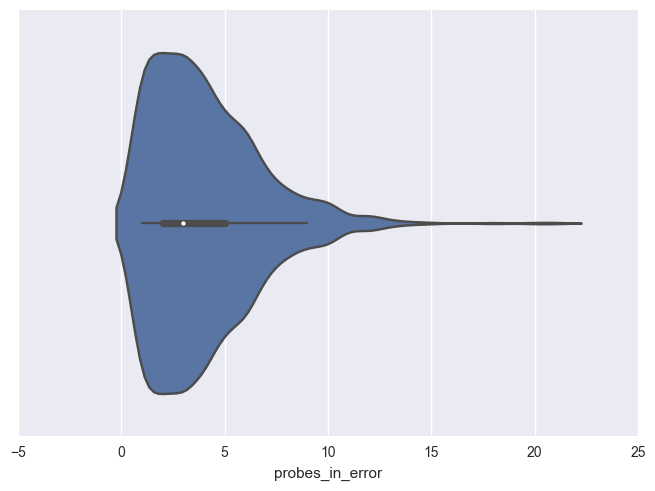

In [13]:
# We can get a measure of how many probes are in error
error_probe_counts = errors['locus_tag'].groupby(errors['locus_tag']).agg(['count'])
error_probe_counts.columns=['probes_in_error']
sns.violinplot(error_probe_counts['probes_in_error']);

In [14]:
# Which errors affect our predicted treatment?
errors_treatment = errors.loc[errors['treatment'] == 1]
errors_treatment.shape

(3899, 51)

In [15]:
error_treatment_locus_tags = errors_treatment['locus_tag'].unique()
error_treatment_locus_tags.shape

(1198,)

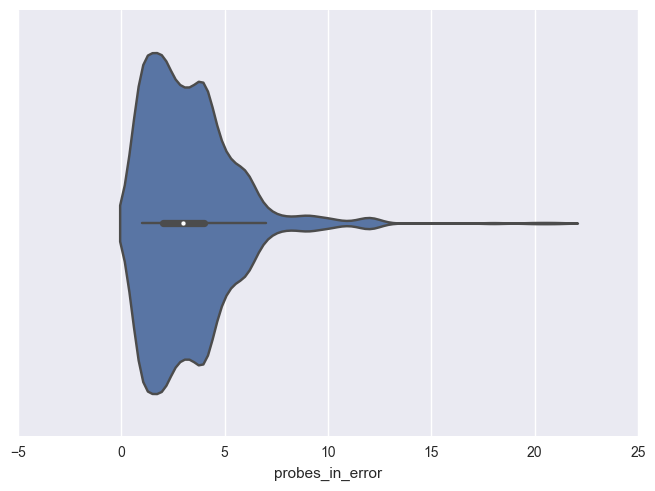

In [16]:
# We can get a measure of how many probes are in error
error_treatment_probe_counts = errors_treatment['locus_tag'].groupby(errors_treatment['locus_tag']).agg(['count'])
error_treatment_probe_counts.columns=['probes_in_error']
sns.violinplot(error_treatment_probe_counts['probes_in_error']);

In [17]:
# How many Sakai tags in error for treatment?
len([tag for tag in error_treatment_locus_tags if tag.startswith('ECs')])

1147

In [18]:
# How many Sakai tags in error for treatment, with more than three probes?
df = error_treatment_probe_counts.loc[error_treatment_probe_counts['probes_in_error'] > 3]
df.shape

(480, 1)

## How does prediction error relate to predicted treatment effect?

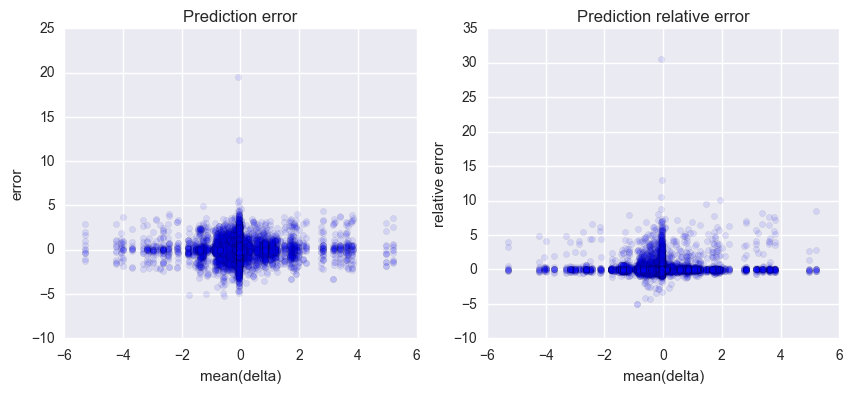

In [20]:
# Plot error and relative error against mean estimate for delta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(results_merged['d_mean'], results_merged['y_pred_error'], alpha=0.1)
ax1.set_xlabel('mean(delta)')
ax1.set_ylabel('error')
ax1.set_title('Prediction error')

ax2.scatter(results_merged['d_mean'], results_merged['y_pred_relative_error'], alpha=0.1)
ax2.set_xlabel('mean(delta)')
ax2.set_ylabel('relative error')
ax2.set_title('Prediction relative error');

Happily, the absolute and relative errors seem to be pretty constant, with estimate of $\delta_{j[i]}$. This is good news, as it means we can probably trust our predictions of large treatment effects - at least as far as those that have small treatment effects.

In [22]:
# Add column dividing probes into those whose genes have a significant treatment
# effect, and those who don't.
results_merged['significant'] = abs(results_merged['d_mean']) - abs(results_merged['d_sem']) > 0

In [28]:
# Visualise distributions of errors for probes
positives = results_merged.loc[results_merged['significant'] & (results_merged['d_mean'] > 0)]
positives.shape

(1158, 52)

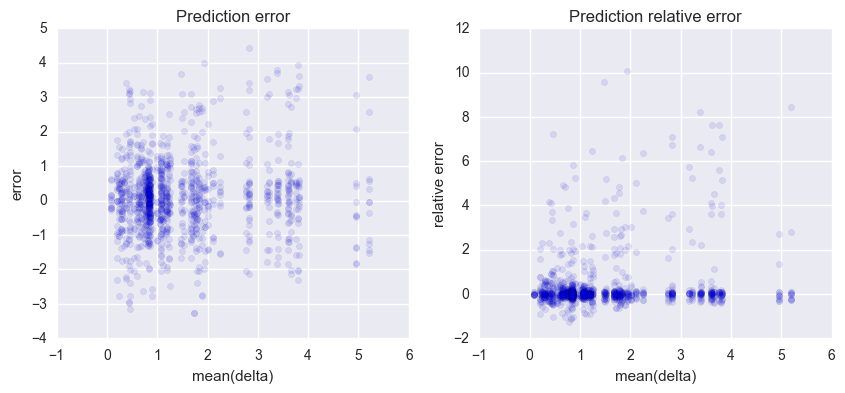

In [30]:
# Plot error and relative error against mean estimate for delta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(positives['d_mean'], positives['y_pred_error'], alpha=0.1)
ax1.set_xlabel('mean(delta)')
ax1.set_ylabel('error')
ax1.set_title('Prediction error')

ax2.scatter(positives['d_mean'], positives['y_pred_relative_error'], alpha=0.1)
ax2.set_xlabel('mean(delta)')
ax2.set_ylabel('relative error')
ax2.set_title('Prediction relative error');

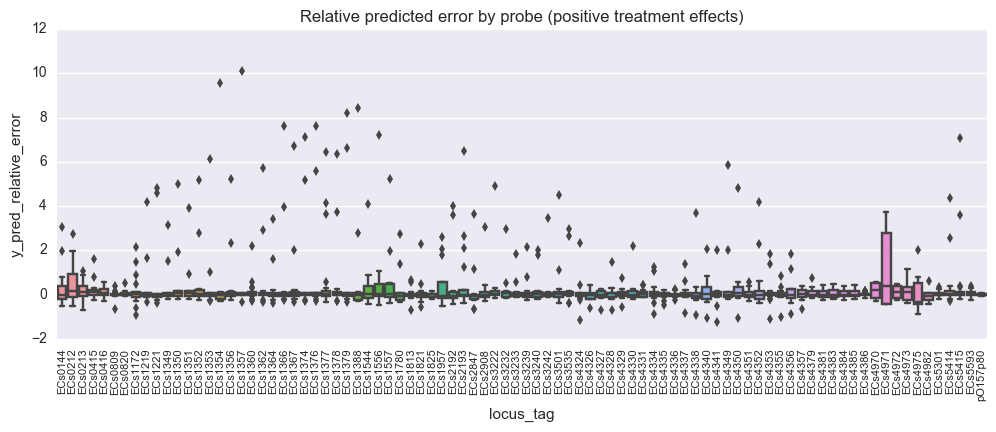

In [46]:
# Visualise distribution of errors by probe, for each locus tag.
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
errplt = sns.boxplot(x=positives['locus_tag'], y=positives['y_pred_relative_error'], ax=ax1)
for item in errplt.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(8)
errplt.set_title("Relative predicted error by probe (positive treatment effects)");

All of the genewise errors have distributions close to zero relative error, taken over all probes. However, some genes have very noisy responses (one or a few probes with large relative error).

In [66]:
positives.loc[positives['locus_tag'] == 'ECs1172'][['probe', 'log_output', 'y_pred_5pc',
                                                    'y_pred_median', 'y_pred_95pc', 'd_median',
                                                    'y_pred_relative_error']].sort_values('probe')

,probe,log_output,y_pred_5pc,y_pred_median,y_pred_95pc,d_median,y_pred_relative_error
38402,A_07_P051326,0.735282,1.641969,2.316441,2.994352,1.316998,2.150413
38413,A_07_P051326,4.770622,4.207593,5.382002,6.194027,1.316998,0.128155
38410,A_07_P051326,6.194185,5.233940,5.915323,6.577829,1.316998,-0.045020
38405,A_07_P051326,1.076278,1.325161,2.027214,2.787583,1.316998,0.883541
38406,A_07_P051326,0.998726,-0.656171,0.091012,0.803053,1.316998,-0.908872
38407,A_07_P051326,5.780935,5.392856,6.122356,6.807885,1.316998,0.059060
38400,A_07_P053006,0.902769,1.585075,2.230671,2.907604,1.316998,1.470920
38415,A_07_P053006,0.612603,0.126773,0.909854,1.678463,1.316998,0.485226
38409,A_07_P053006,6.189742,4.992567,5.802194,6.592007,1.316998,-0.062611
38417,A_07_P053006,4.859667,3.935793,5.006187,6.092938,1.316998,0.030150


In [115]:
def plot_probe_predictions(locustag, df):
    """Plot prediction range and measured value for a specific gene"""
    ltdata = df.loc[df['locus_tag'] == locustag].sort_values(['probe', 'treatment', 'replicate'])
    plt.scatter(range(len(ltdata)), ltdata['log_output'], color='k')
    for idx, obs, plo, pmd, phi in zip(range(len(ltdata)),
                                       ltdata['log_output'],
                                       ltdata['y_pred_5pc'],
                                       ltdata['y_pred_median'],
                                       ltdata['y_pred_95pc']):
        if plo < obs < phi:
            lcolor = 'b-'
            pcolor = 'b.'
        else:
            lcolor = 'r-'
            pcolor = 'r.'
        plt.plot([idx, idx], [plo, phi], lcolor)
        plt.plot([idx, idx], [pmd, pmd], pcolor)
    plt.xticks(range(len(ltdata)), ltdata['probe'], rotation=90)
    plt.xlim(-1, len(ltdata))
    plt.title("Probe predictions: {0}, delta: {1}".format(locustag, ltdata['d_median'].unique()))

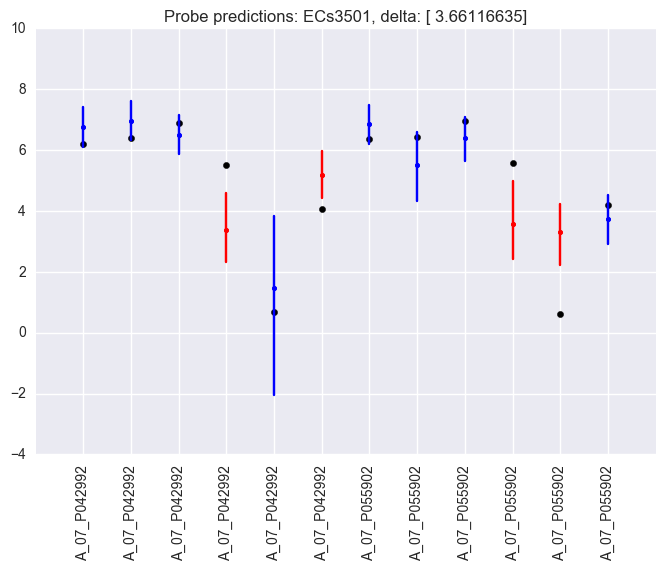

In [126]:
plot_probe_predictions('ECs3501', positives)

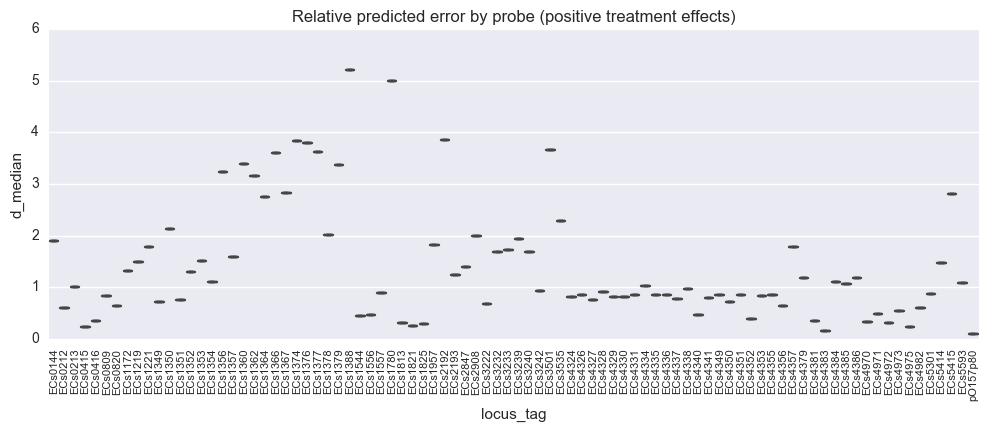

In [118]:
# Visualise distribution of delta estimates by probe, for each locus tag.
fig, ax1 = plt.subplots(1, 1, figsize=(12, 4))
deltaplt = sns.boxplot(x=positives['locus_tag'], y=positives['d_median'], ax=ax1)
for item in deltaplt.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(8)
deltaplt.set_title("Relative predicted error by probe (positive treatment effects)");